# Hacktiv8 Python for Data Science - Sesi 12

Sesi 12:

- Classification 1

## Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]), array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))

In [4]:
model = LogisticRegression()

In [5]:
model.fit(x, y)

/home/ardhiraka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
model.classes_

array([0, 1])

In [7]:
model.intercept_, model.coef_

(array([-1.04608067]), array([[0.51491375]]))

In [8]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [13]:
y_pred = model.predict(x)

In [11]:
model.score(x, y)

0.9

In [15]:
cm = confusion_matrix(y, y_pred)

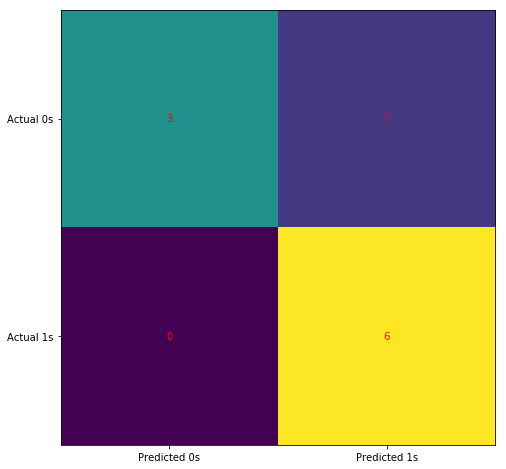

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='r')

plt.show()

In [28]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

   micro avg       0.90      0.90      0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [29]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
print(model.predict(x))

[0 0 0 0 1 1 1 1 1 1]


In [32]:
model.score(x, y)

1.0

In [33]:
# Example 2

# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [35]:
# Example 3

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
x, y = load_digits(return_X_y=True)

In [37]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [38]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [65]:
model = LogisticRegression(solver='lbfgs', multi_class='ovr')

In [66]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
X_test = scaler.fit_transform(X_test)

In [68]:
y_pred = model.predict(X_test)

In [69]:
cm = confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 37,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 38]])

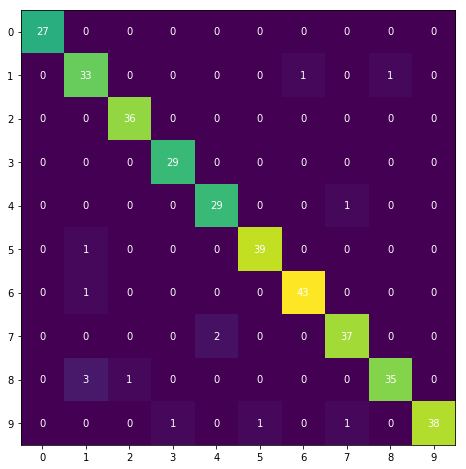

In [71]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))

for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='w')

plt.show()

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.87      0.94      0.90        35
           2       0.97      1.00      0.99        36
           3       0.97      1.00      0.98        29
           4       0.94      0.97      0.95        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.95      0.95      0.95        39
           8       0.97      0.90      0.93        39
           9       1.00      0.93      0.96        41

   micro avg       0.96      0.96      0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



## KNN

In [73]:
# Assigning features and label variables

# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [74]:
from sklearn import preprocessing

In [75]:
le = preprocessing.LabelEncoder()

In [76]:
weather_encoded = le.fit_transform(weather)
weather_encoded

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1])

In [79]:
temp_encoded = le.fit_transform(temp)

label = le.fit_transform(play)
temp_encoded

array([1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2])

In [80]:
features = list(zip(weather_encoded, temp_encoded))

print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [81]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(features, label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [82]:
model.score(features, label)

0.7142857142857143

In [83]:
model.predict([[0, 2]])

array([1])

In [84]:
# KNN With Multiple Labels

In [85]:
from sklearn import datasets

wine = datasets.load_wine()

In [87]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [88]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [89]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [90]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [92]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [94]:
from sklearn import metrics

In [95]:
metrics.accuracy_score(y_test, y_pred)

0.7037037037037037

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [97]:
metrics.accuracy_score(y_test, y_pred)

0.7407407407407407

In [98]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

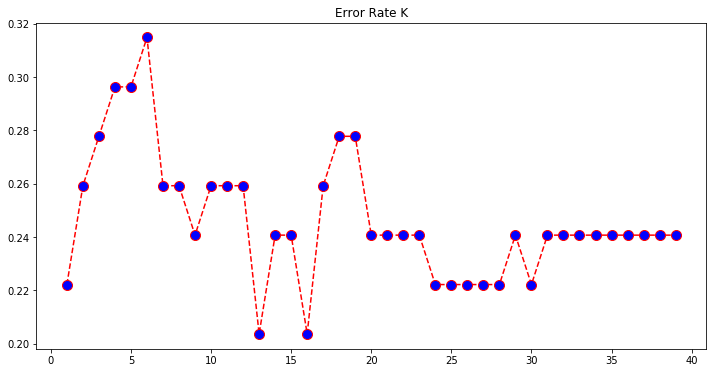

In [106]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='r', linestyle='dashed', marker='o',
        markerfacecolor='b', markersize=10)

plt.title('Error Rate K')
plt.show()

In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [108]:
metrics.accuracy_score(y_test, y_pred)

0.7962962962962963

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.6851851851851852